In [30]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [31]:
import numpy as np
import pandas as pd
import datetime as dt



# Reflect Tables into SQLAlchemy ORM

In [32]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import create_engine, inspect, text
from datetime import date

In [36]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [37]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [38]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [39]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [40]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [41]:
# Determine column names for measurment table
inspector = inspect(engine)
columns_measurement = [x['name'] for x in inspector.get_columns('measurement')]
columns_measurement


['id', 'station', 'date', 'prcp', 'tobs']

In [42]:
# Determine columns for station table
columns_station=[y['name'] for y in inspector.get_columns('station')]
columns_station

['id', 'station', 'name', 'latitude', 'longitude', 'elevation']

In [43]:
# Find the most recent date in the data set.
#recent date = latest date
# Only the measurement table has a date column, so find latest date of Measurement 
lastest_date=session.query(Measurement.date).order_by(Measurement.date.desc()).first()
lastest_date

('2017-08-23',)

In [44]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
one_yr_before = dt.date(2017, 8, 23)-dt.timedelta(days=365)
one_yr_before

datetime.date(2016, 8, 23)

In [45]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results.  
Precip_df = [Measurement.date, 
       Measurement.prcp]
Filtered=session.query(*Precip_df).\
    filter(Measurement.date >= one_yr_before).\
    order_by(Measurement.date.desc()).all()
print (Filtered)

[('2017-08-23', 0.0), ('2017-08-23', 0.0), ('2017-08-23', 0.08), ('2017-08-23', 0.45), ('2017-08-22', 0.0), ('2017-08-22', 0.0), ('2017-08-22', 0.5), ('2017-08-21', 0.0), ('2017-08-21', 0.02), ('2017-08-21', None), ('2017-08-21', 0.56), ('2017-08-20', 0.0), ('2017-08-20', 0.01), ('2017-08-20', None), ('2017-08-19', 0.0), ('2017-08-19', 0.0), ('2017-08-19', None), ('2017-08-19', 0.09), ('2017-08-18', 0.0), ('2017-08-18', 0.0), ('2017-08-18', 0.06), ('2017-08-18', None), ('2017-08-17', 0.0), ('2017-08-17', 0.05), ('2017-08-17', 0.01), ('2017-08-17', 0.13), ('2017-08-16', 0.0), ('2017-08-16', 0.07), ('2017-08-16', 0.12), ('2017-08-16', 0.42), ('2017-08-15', 0.02), ('2017-08-15', 0.0), ('2017-08-15', 0.06), ('2017-08-15', 0.32), ('2017-08-15', 0.42), ('2017-08-14', 0.0), ('2017-08-14', 0.01), ('2017-08-14', 0.08), ('2017-08-14', 0.0), ('2017-08-14', 0.22), ('2017-08-13', 0.0), ('2017-08-13', None), ('2017-08-13', 0.0), ('2017-08-13', 0.0), ('2017-08-13', None), ('2017-08-12', 0.0), ('2017-

Text(0, 0.5, 'Inches')

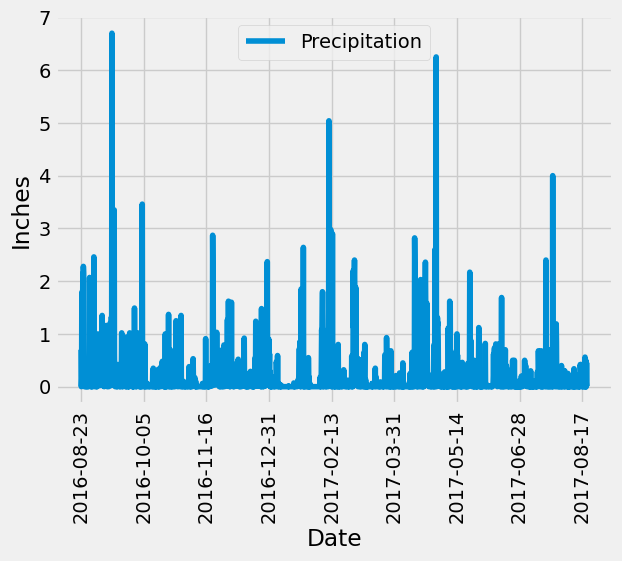

In [14]:
# Save the query results as a Pandas DataFrame. Explicitly set the column names
plot_df = pd.DataFrame(Filtered, columns=['Date','Precipitation'])
plot_df.dropna(subset=['Precipitation'], inplace=True)
plot_df
# Sort the dataframe by date
plot_df=plot_df.sort_values(by=['Date'])
plot_df

# Use Pandas Plotting with Matplotlib to plot the data

plot_df.plot(x = 'Date', y = 'Precipitation', rot = 90)
plt.xlabel('Date')
plt.ylabel('Inches')


In [15]:
# Use Pandas to calculate the summary statistics for the precipitation data
new=pd.DataFrame(plot_df['Precipitation'].describe())
new

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [16]:
#Get list of stations from 'Station' table
for station in session.query(Station.station).all():
    print(station)

#Count number of rows, or number of stations in the table
session.query(Station.station).count()

('USC00519397',)
('USC00513117',)
('USC00514830',)
('USC00517948',)
('USC00518838',)
('USC00519523',)
('USC00519281',)
('USC00511918',)
('USC00516128',)


9

In [17]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [18]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
sel = [func.min(Measurement.tobs), 
       func.max(Measurement.tobs), 
       func.avg(Measurement.tobs)]
max_station = session.query(*sel).\
    filter(Measurement.station == "USC00519281").all()
max_station


[(54.0, 85.0, 71.66378066378067)]

In [24]:
sel_data= [(Measurement.tobs),(Measurement.date)]
sel_data_top = session.query(*sel_data).\
    filter(Measurement.station == "USC00519281").filter(Measurement.date>= one_yr_before).all()
sel_data_top 

[(77.0, '2016-08-23'),
 (77.0, '2016-08-24'),
 (80.0, '2016-08-25'),
 (80.0, '2016-08-26'),
 (75.0, '2016-08-27'),
 (73.0, '2016-08-28'),
 (78.0, '2016-08-29'),
 (77.0, '2016-08-30'),
 (78.0, '2016-08-31'),
 (80.0, '2016-09-01'),
 (80.0, '2016-09-02'),
 (78.0, '2016-09-03'),
 (78.0, '2016-09-04'),
 (78.0, '2016-09-05'),
 (73.0, '2016-09-06'),
 (74.0, '2016-09-07'),
 (80.0, '2016-09-08'),
 (79.0, '2016-09-09'),
 (77.0, '2016-09-10'),
 (80.0, '2016-09-11'),
 (76.0, '2016-09-12'),
 (79.0, '2016-09-13'),
 (75.0, '2016-09-14'),
 (79.0, '2016-09-15'),
 (78.0, '2016-09-16'),
 (79.0, '2016-09-17'),
 (78.0, '2016-09-18'),
 (78.0, '2016-09-19'),
 (76.0, '2016-09-20'),
 (74.0, '2016-09-21'),
 (77.0, '2016-09-22'),
 (78.0, '2016-09-23'),
 (79.0, '2016-09-24'),
 (79.0, '2016-09-25'),
 (77.0, '2016-09-26'),
 (80.0, '2016-09-27'),
 (78.0, '2016-09-28'),
 (78.0, '2016-09-29'),
 (78.0, '2016-09-30'),
 (77.0, '2016-10-01'),
 (79.0, '2016-10-02'),
 (79.0, '2016-10-03'),
 (79.0, '2016-10-04'),
 (79.0, '20

In [25]:
top_station_twelve = pd.DataFrame(sel_data_top, columns=['Temperature','Date'])
top_station_twelve
# top_station_twelve.to_excel('test2.xlsx', index=False)

,Temperature,Date
0,77.0,2016-08-23
1,77.0,2016-08-24
2,80.0,2016-08-25
3,80.0,2016-08-26
4,75.0,2016-08-27
...,...,...
347,77.0,2017-08-14
348,77.0,2017-08-15
349,76.0,2017-08-16
350,76.0,2017-08-17


Text(0.5, 0, 'Temperature')

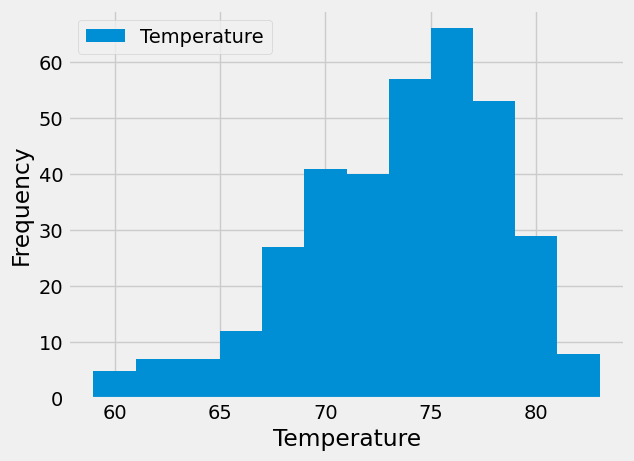

In [28]:
# plot the results as a histogram
top_station_twelve.plot.hist(bins=12)
plt.xlabel('Temperature')

# Close Session

In [29]:
# Close Session
session.close()